<a href="https://colab.research.google.com/github/angellakatusiime/GROUP-7/blob/main/Automated_Detection_of_Sea_Turtle_Facial_Patterns_Using_Bounding_Box_Frameworks_YOLO_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2

In [ ]:
%pip install -qq ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.0/107.7 GB disk)


In [ ]:
# Run inference on an image with YOLOv8n
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 430.4ms
Speed: 21.1ms preprocess, 430.4ms inference, 23.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('/content/yolov8n.pt')
results = model.predict('https://ultralytics.com/images/zidane.jpg')

# Extract bounding boxes, classes, names, and confidences
# boxes = results[0].boxes.xyxy.tolist()
boxes = results[0].boxes.xywhn.tolist()[0]
classes = results[0].boxes.cls.tolist()
names = results[0].names
confidences = results[0].boxes.conf.tolist()

print(boxes)
xmin = min(boxes[::2])
xmax = max(boxes[::2])
ymin = min(boxes[1::2])
ymax = max(boxes[1::2])
print('--------')
print(xmin, ymin, xmax-xmin, ymax-ymin)
print('-------')
print(classes)
print(names)
print(confidences)
# # Iterate through the results
# for box, cls, conf in zip(boxes, classes, confidences):
#     x1, y1, x2, y2 = box
#     confidence = conf
#     detected_class = cls
#     name = names[int(cls)]


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 222.5ms
Speed: 4.9ms preprocess, 222.5ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
[0.48021048307418823, 0.6314593553543091, 0.780936598777771, 0.7145518660545349]
--------
0.48021048307418823 0.6314593553543091 0.30072611570358276 0.08309251070022583
-------
[0.0, 0.0, 27.0]
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis r

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Create Dataset**

In [ ]:
!unzip -qq '/content/IMAGES_1024.zip'

replace IMAGES_1024/974873B6.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!unzip -qq '/content/IMAGES_512.zip'

replace IMAGES_512/974873B6.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
train = pd.read_csv('/content/Train.csv')
ss = pd.read_csv('/content/SampleSubmission.csv')

In [ ]:
imgs_1024 = [i[:-4] for i in os.listdir('/content/IMAGES_1024')]
imgs_512 = [i[:-4] for i in os.listdir('/content/IMAGES_512')]
vals = [i in imgs_512 for i in imgs_1024]
all(vals)

True

In [ ]:
len(imgs_512), len(imgs_1024)

(2023, 2021)

In [ ]:
train.head()

,Image_ID,x,y,w,h
0,04FB1B33,0.481988,0.506076,0.174696,0.405671
1,B04E481E,0.617405,0.313368,0.177734,0.293113
2,32655645,0.490885,0.465856,0.165582,0.357350
3,44D4DA7C,0.472873,0.506076,0.237847,0.409722
4,4F36EF72,0.433811,0.574363,0.180773,0.397569


In [ ]:
im = cv2.imread('/content/IMAGES_1024/00309D7D.JPG')
img_h, img_w, _ = im.shape


In [ ]:
img_w, img_h

(1024, 768)

In [ ]:
ss[ss['Image_ID'] == '4863D911']

,Image_ID,x,y,w,h
0,4863D911,0,0,0,0


In [ ]:
train['id'] = 0
train['class'] = 'turtle_face' #2.0

def coco_to_yolo(x1, y1, w, h, image_w, image_h):
    # return [((2*x1 + w)/(2*image_w)) , ((2*y1 + h)/(2*image_h)), w/image_w, h/image_h]
    return [(2*x1 + w)/2 , (2*y1 + h)/2, w, h]

train['yolo'] = train.apply(lambda row: coco_to_yolo(row['x'], row['y'], row['w'], row['h'], img_w, img_h), axis=1)

In [ ]:
!mkdir Turtle_dataset
!mkdir Turtle_dataset/train  Turtle_dataset/train/images Turtle_dataset/train/labels
!mkdir Turtle_dataset/val Turtle_dataset/val/images Turtle_dataset/val/labels
!mkdir Turtle_dataset/test Turtle_dataset/test/images Turtle_dataset/test/labels

mkdir: cannot create directory ‘Turtle_dataset’: File exists
mkdir: cannot create directory ‘Turtle_dataset/train’: File exists
mkdir: cannot create directory ‘Turtle_dataset/train/images’: File exists
mkdir: cannot create directory ‘Turtle_dataset/train/labels’: File exists
mkdir: cannot create directory ‘Turtle_dataset/val’: File exists
mkdir: cannot create directory ‘Turtle_dataset/val/images’: File exists
mkdir: cannot create directory ‘Turtle_dataset/val/labels’: File exists
mkdir: cannot create directory ‘Turtle_dataset/test’: File exists
mkdir: cannot create directory ‘Turtle_dataset/test/images’: File exists
mkdir: cannot create directory ‘Turtle_dataset/test/labels’: File exists


In [ ]:
%%time
import shutil, random

train_files = random.sample(train['Image_ID'].values.tolist(), 1193) # random sample
val_files = random.sample([i for i in train['Image_ID'].values.tolist() if i not in train_files], 120)
test_files = [i for i in train['Image_ID'].values.tolist() if i not in train_files and i not in val_files]

for f in train_files:
  shutil.copyfile(f'/content/IMAGES_1024/{f}.JPG', f'/content/Turtle_dataset/train/images/{f}.JPG')

for f in val_files:
    shutil.copyfile(f'/content/IMAGES_1024/{f}.JPG', f'/content/Turtle_dataset/val/images/{f}.JPG')

for f in test_files:
    shutil.copyfile(f'/content/IMAGES_1024/{f}.JPG', f'/content/Turtle_dataset/test/images/{f}.JPG')

CPU times: user 103 ms, sys: 564 ms, total: 667 ms
Wall time: 791 ms


In [ ]:
train.head()

,Image_ID,x,y,w,h,id,class,yolo
0,04FB1B33,0.481988,0.506076,0.174696,0.405671,0,turtle_face,"[0.5693359375, 0.708912037037037, 0.1746961805..."
1,B04E481E,0.617405,0.313368,0.177734,0.293113,0,turtle_face,"[0.7062717013888888, 0.4599247685185185, 0.177..."
2,32655645,0.490885,0.465856,0.165582,0.357350,0,turtle_face,"[0.5736762152777778, 0.64453125, 0.16558159722..."
3,44D4DA7C,0.472873,0.506076,0.237847,0.409722,0,turtle_face,"[0.591796875, 0.7109375, 0.2378472222222222, 0..."
4,4F36EF72,0.433811,0.574363,0.180773,0.397569,0,turtle_face,"[0.524197048611111, 0.7731481481481481, 0.1807..."


In [ ]:
from pathlib import Path

def create_yolo_labels(image_path, df, labels_path):
  for i in os.listdir(image_path):
    annotations = df[df['Image_ID'] == i[:-4]]
    filename = f'{labels_path}/{i[:-4]}.txt'
    with open(filename, 'w') as f:
      for _, row in annotations.iterrows():
        xc, yc, x, y = row['yolo'][0], row['yolo'][1], row['yolo'][2], row['yolo'][3]
        class_id = 0 #row['id']
        f.write(f"{class_id} {xc} {yc} {x} {y}\n")

for k in ['train', 'val', 'test']:
  create_yolo_labels(f'/content/Turtle_dataset/{k}/images', train, f'/content/Turtle_dataset/{k}/labels')


In [ ]:
import yaml
labels = ['turtle_face']

yaml_dict = {
    'path': '/content/Turtle_dataset',
    'train': 'train/images',
    'val': 'val/images',
    'names': labels,
    'nc': 1
}

with open('/content/Turtle_dataset/data.yaml', 'w+') as yml_file:
    yaml.dump(yaml_dict, yml_file)

**Custom Training**

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Turtle_dataset/data.yaml epochs=10 imgsz=640 device=cpu plots=True


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Turtle_dataset/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

**Examine**

In [ ]:
!ls /content/runs/detect/train

args.yaml					    labels_correlogram.jpg  weights
events.out.tfevents.1730808854.58052198281d.4744.0  labels.jpg


In [ ]:
from IPython.display import Image

Image(filename=f"/content/runs/detect/train/results.png", width=1000)

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/results.png'

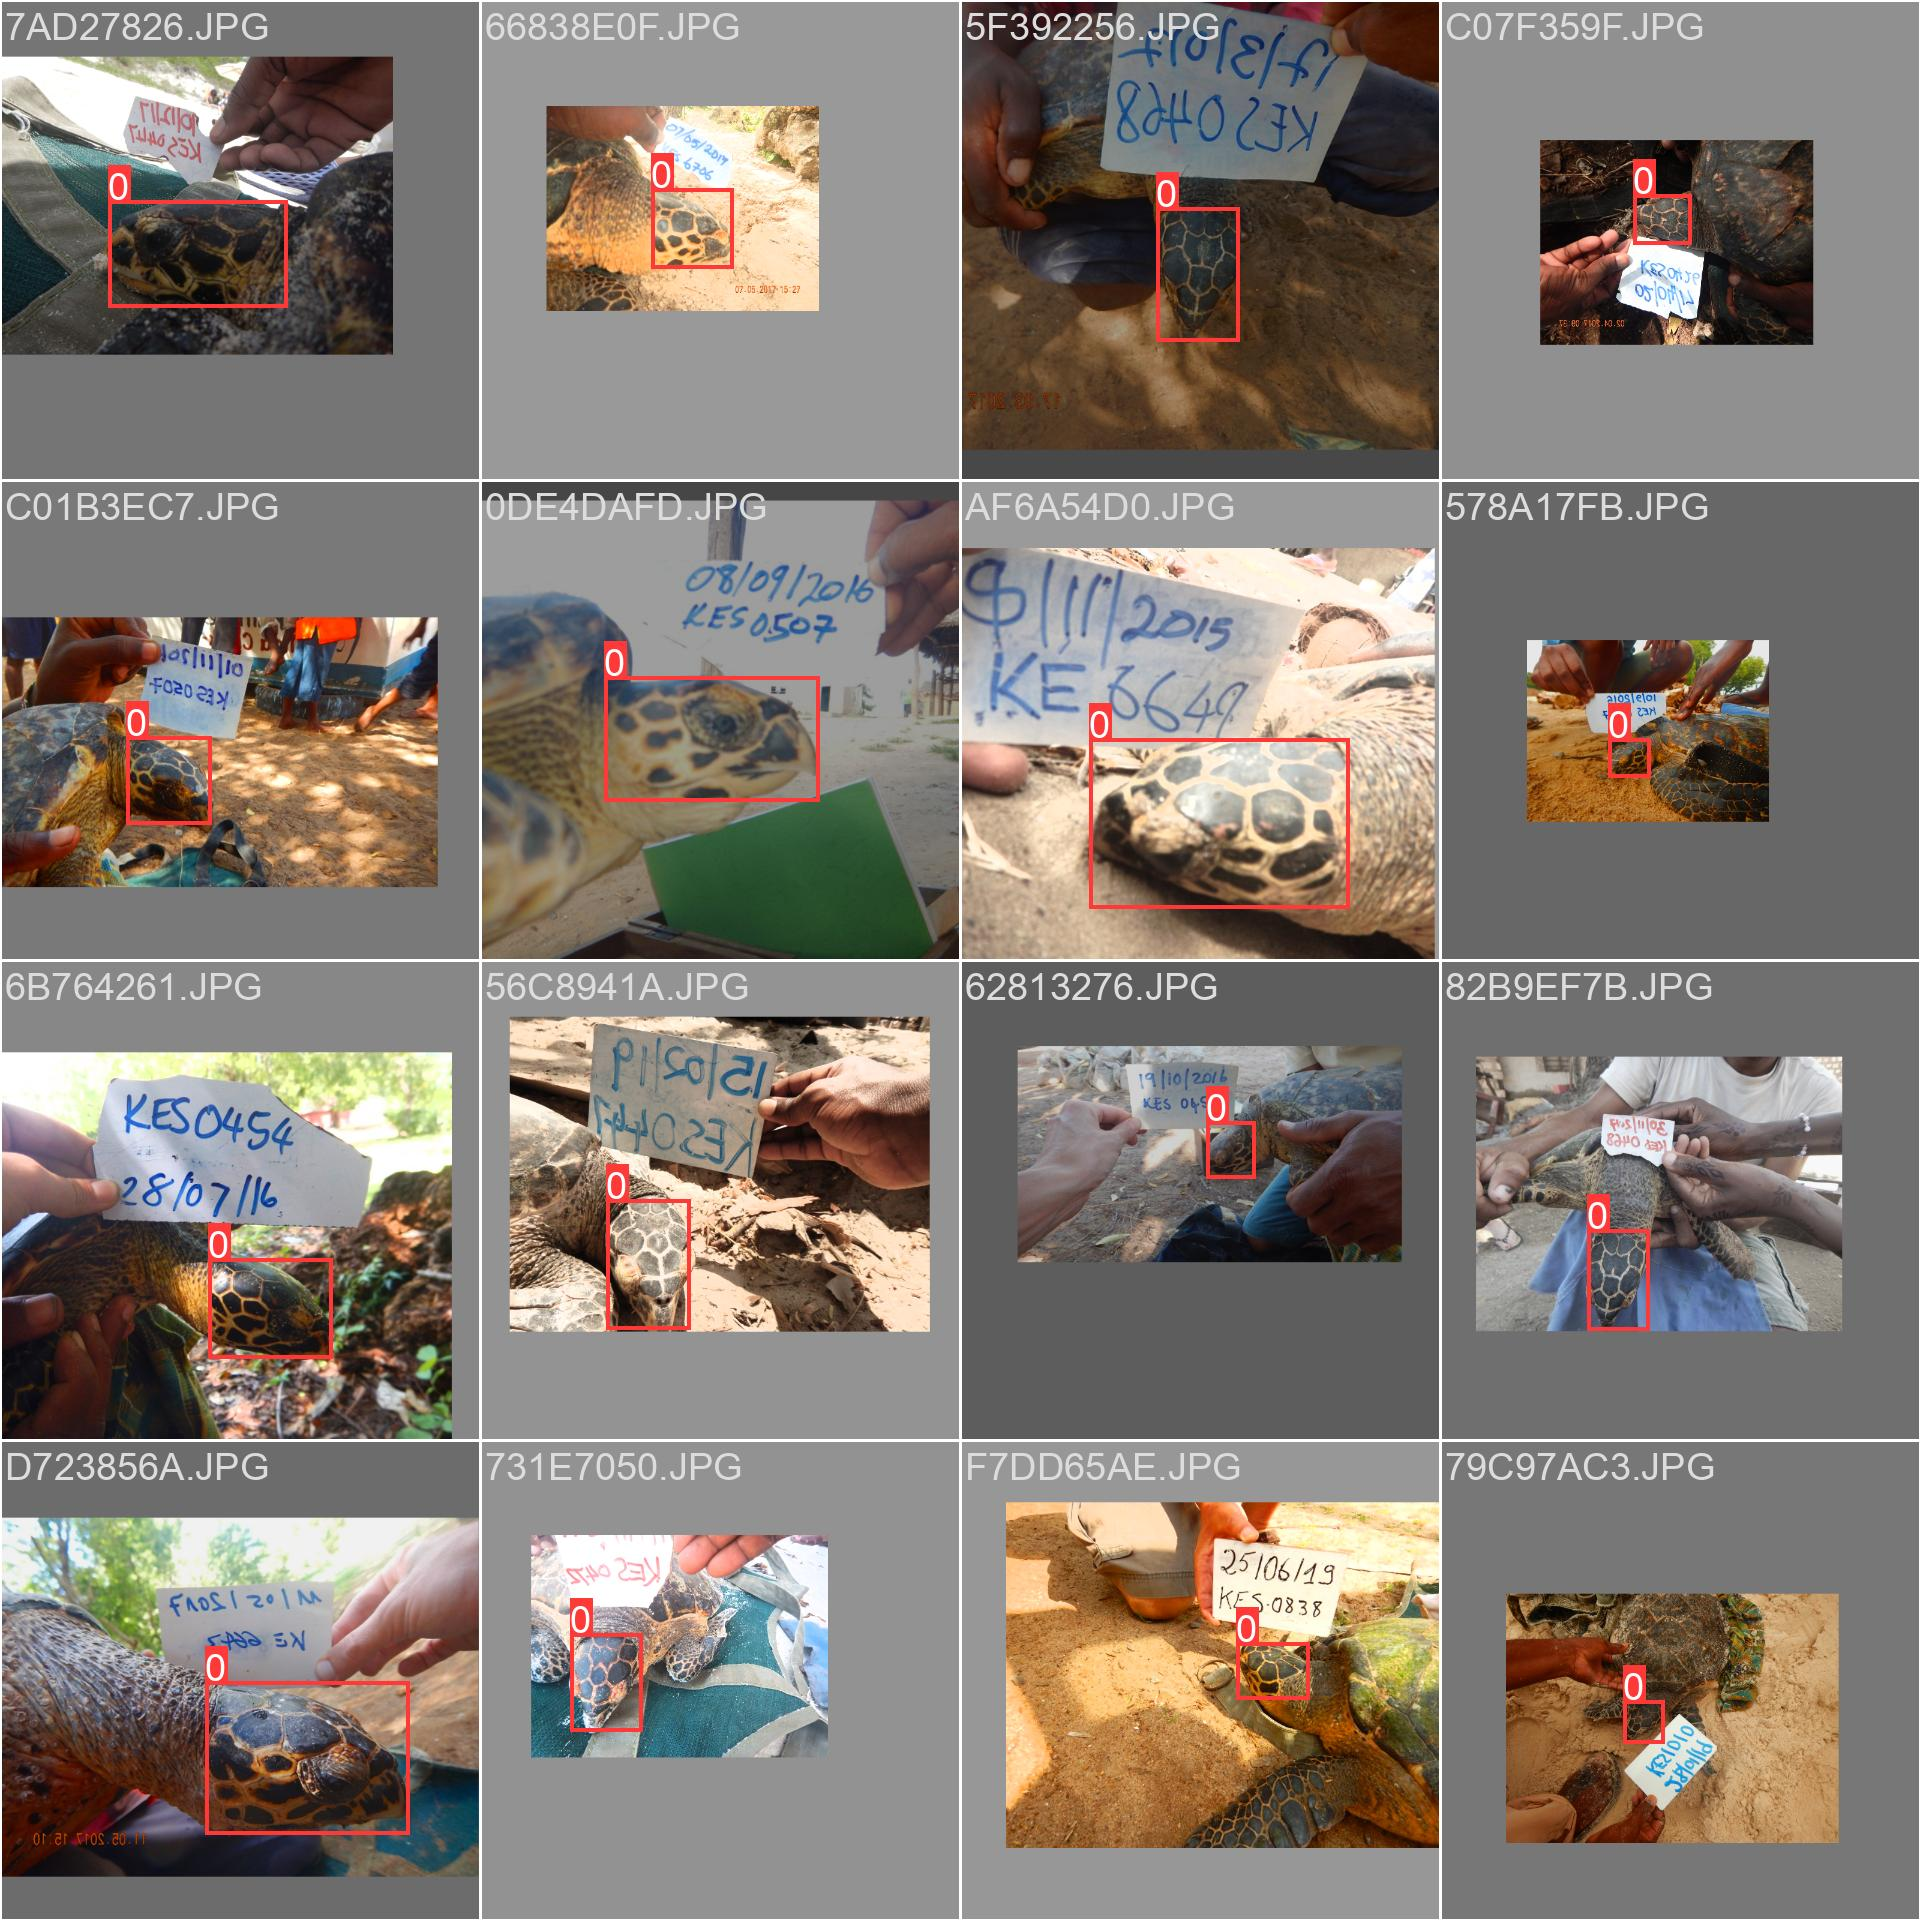

In [ ]:
Image(filename=f"/content/runs/detect/train/train_batch6750.jpg", width=1000)

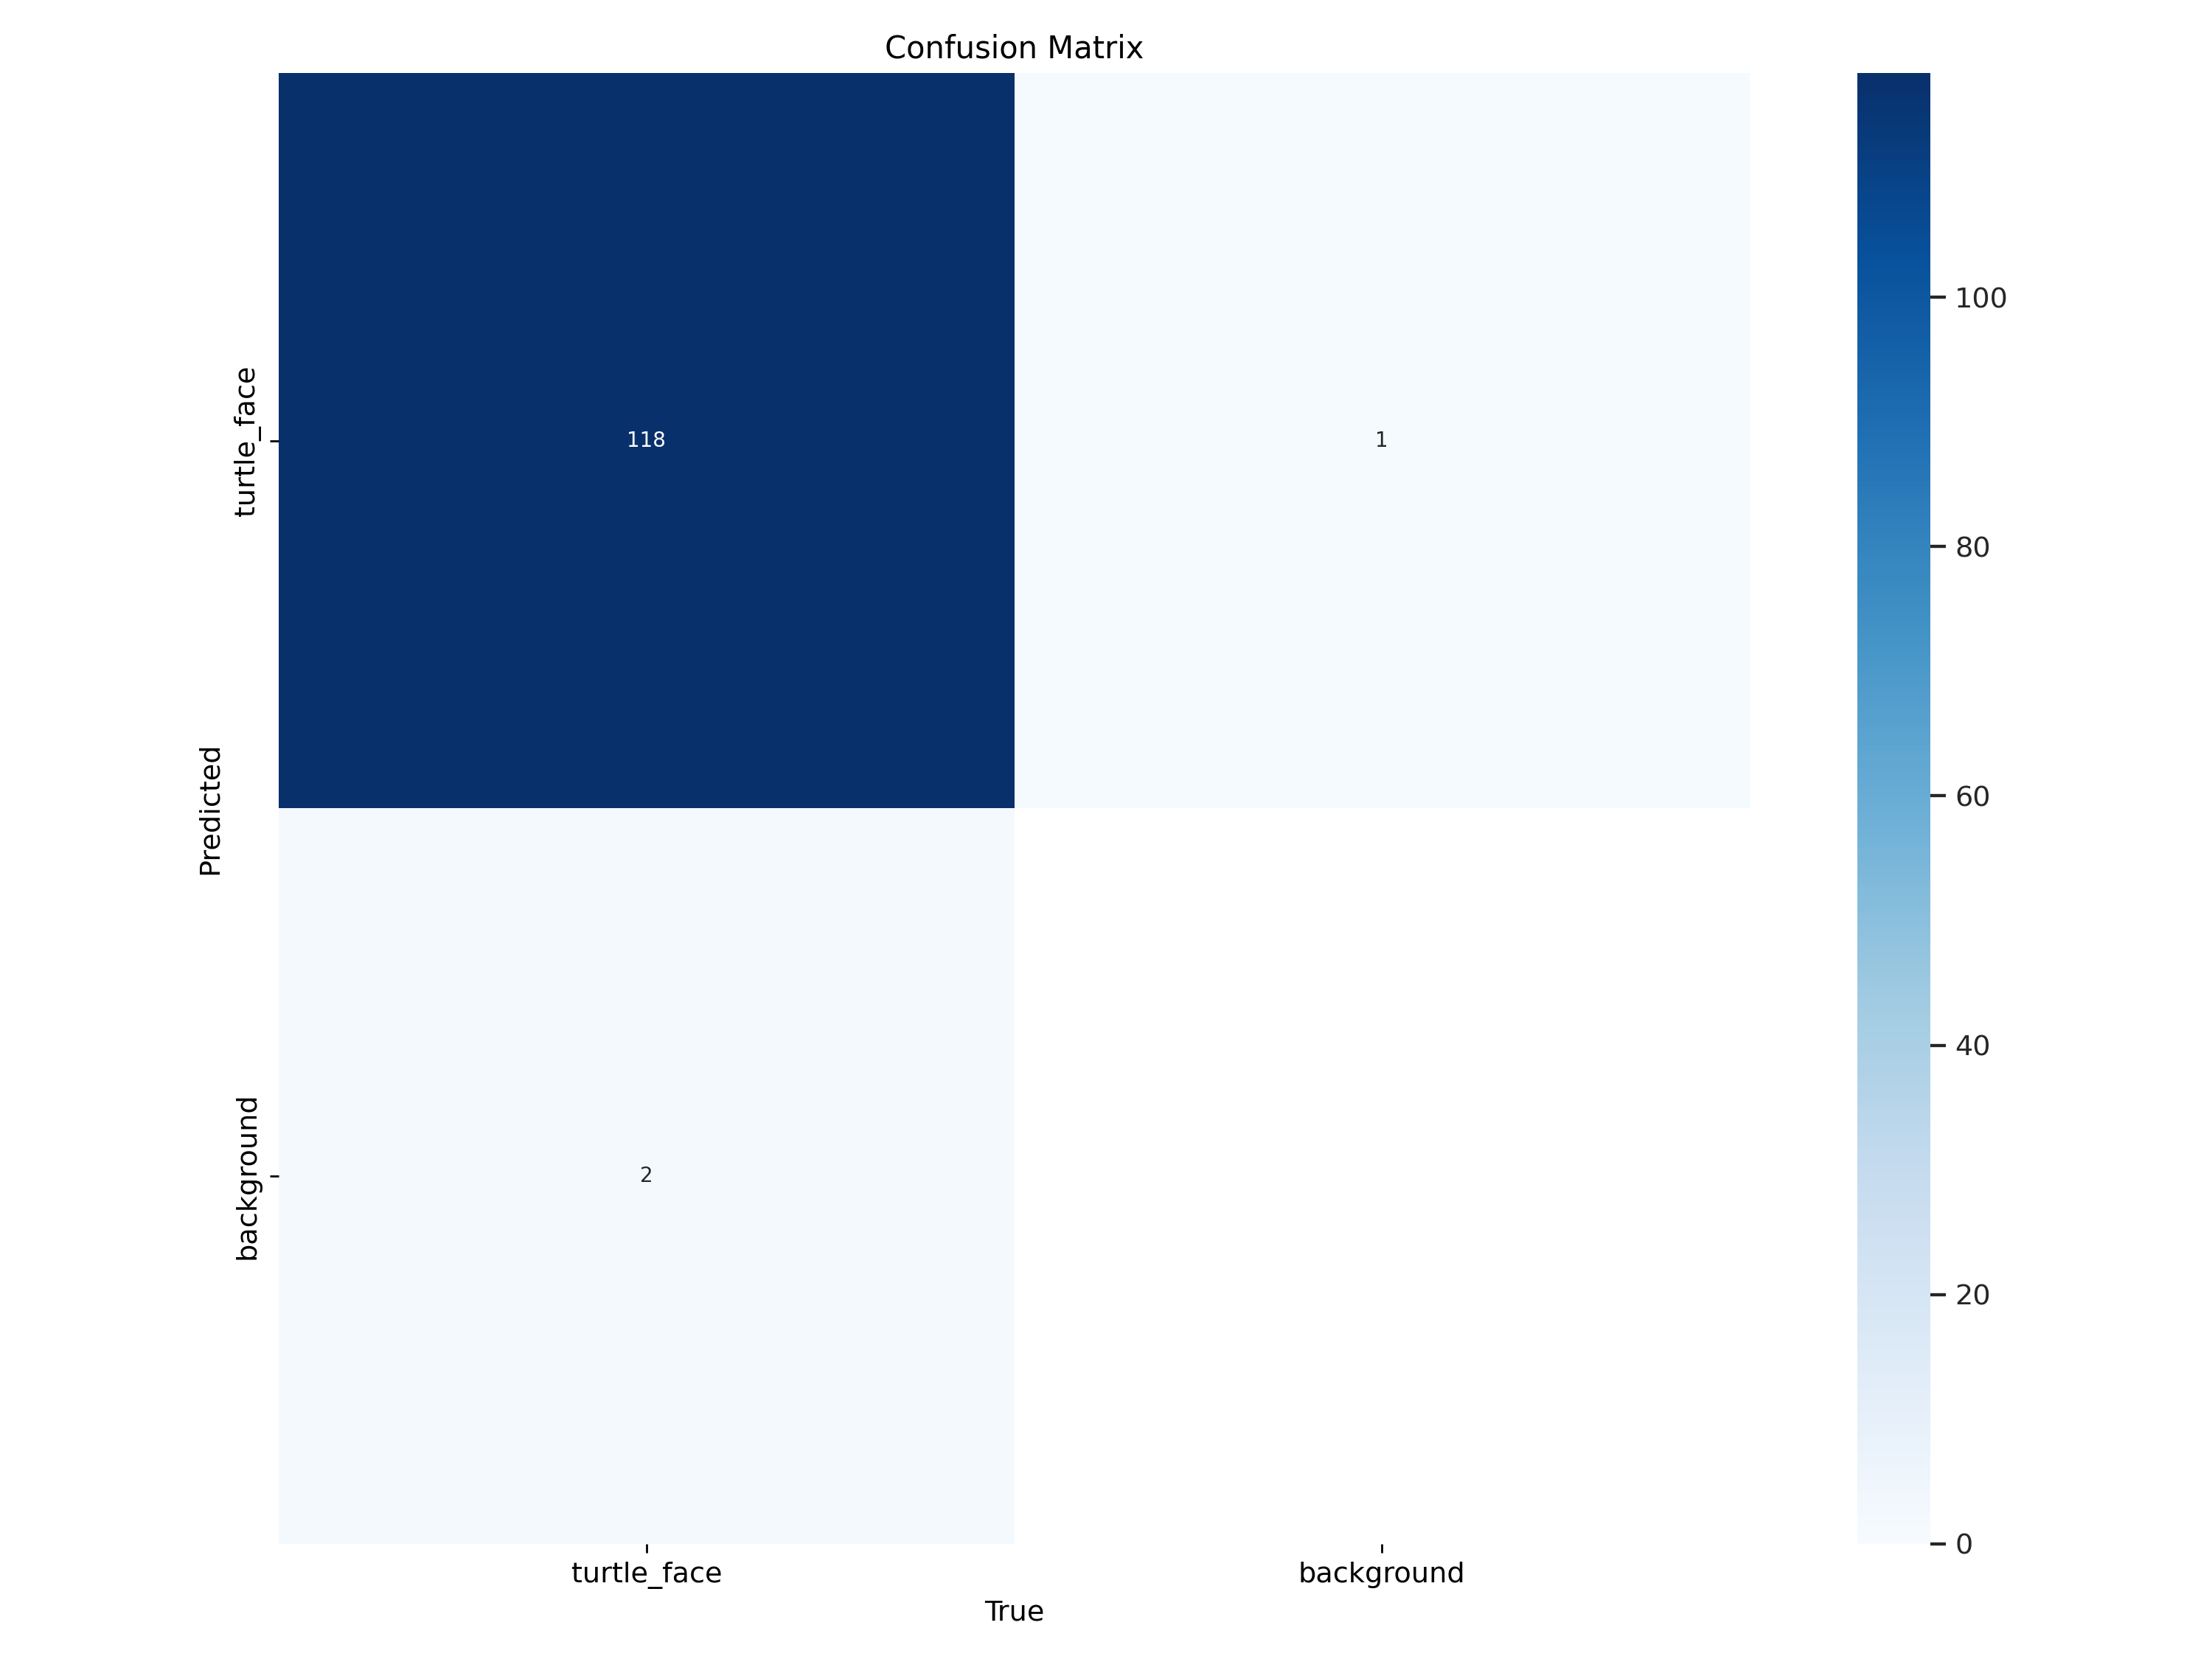

In [ ]:
Image(filename=f"/content/runs/detect/train/confusion_matrix.png", width=1000)

**Validate Custom Model**

In [ ]:
%%time
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/Turtle_dataset/data.yaml

Ultralytics YOLOv8.2.30 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Turtle_dataset/val/labels.cache... 120 images, 0 backgrounds, 0 corrupt: 100% 120/120 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:06<00:00,  1.21it/s]
                   all        120        120      0.983      0.983      0.989      0.909
Speed: 7.7ms preprocess, 27.7ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val
CPU times: user 151 ms, sys: 24.4 ms, total: 175 ms
Wall time: 19.2 s


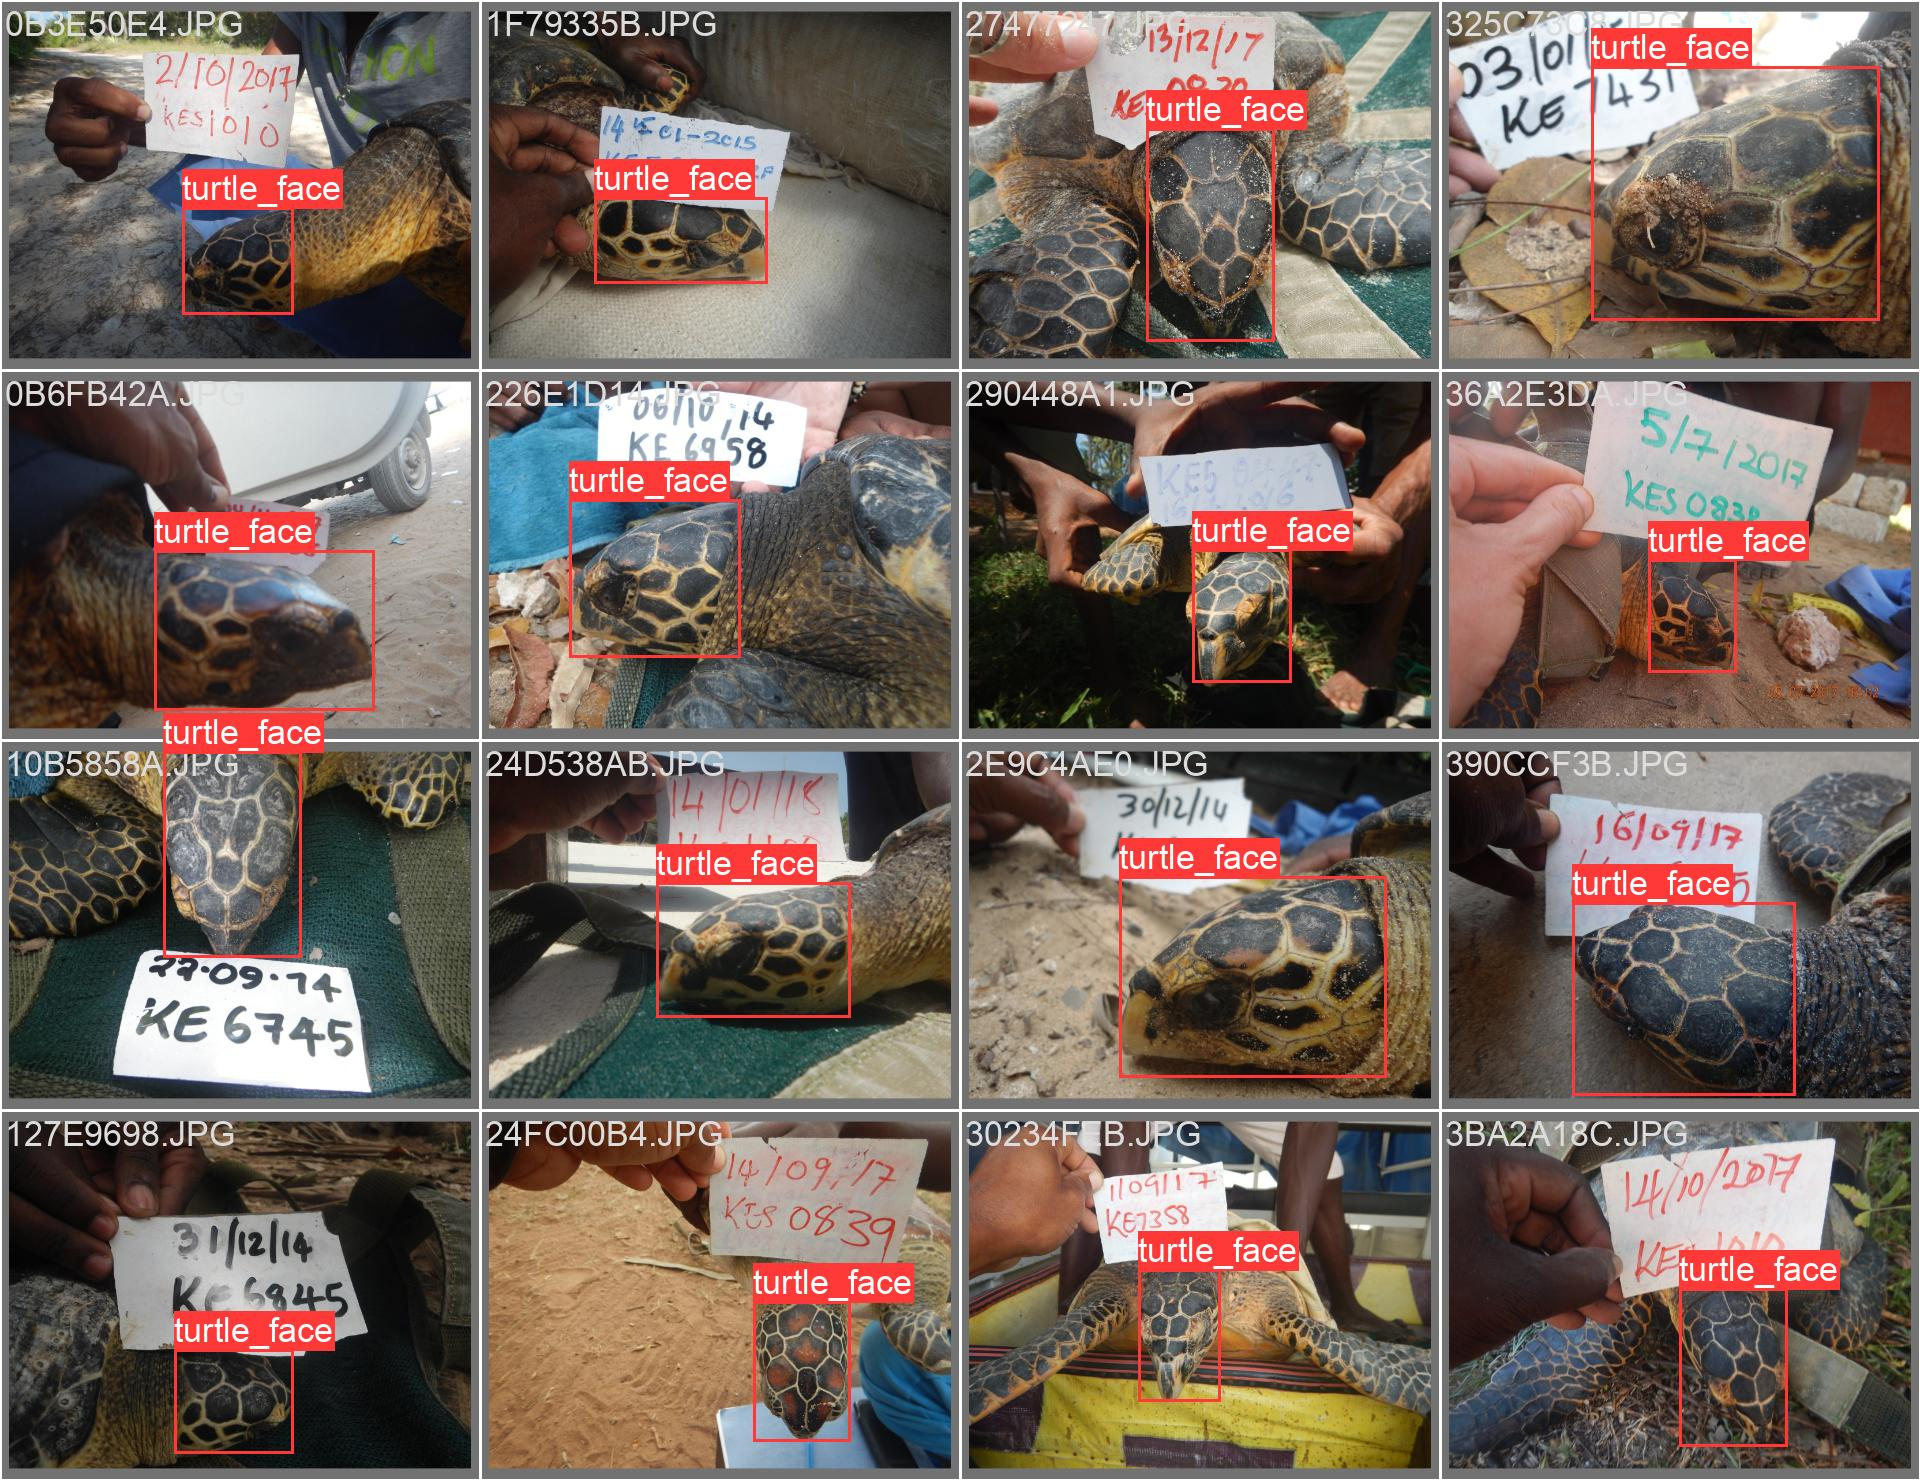

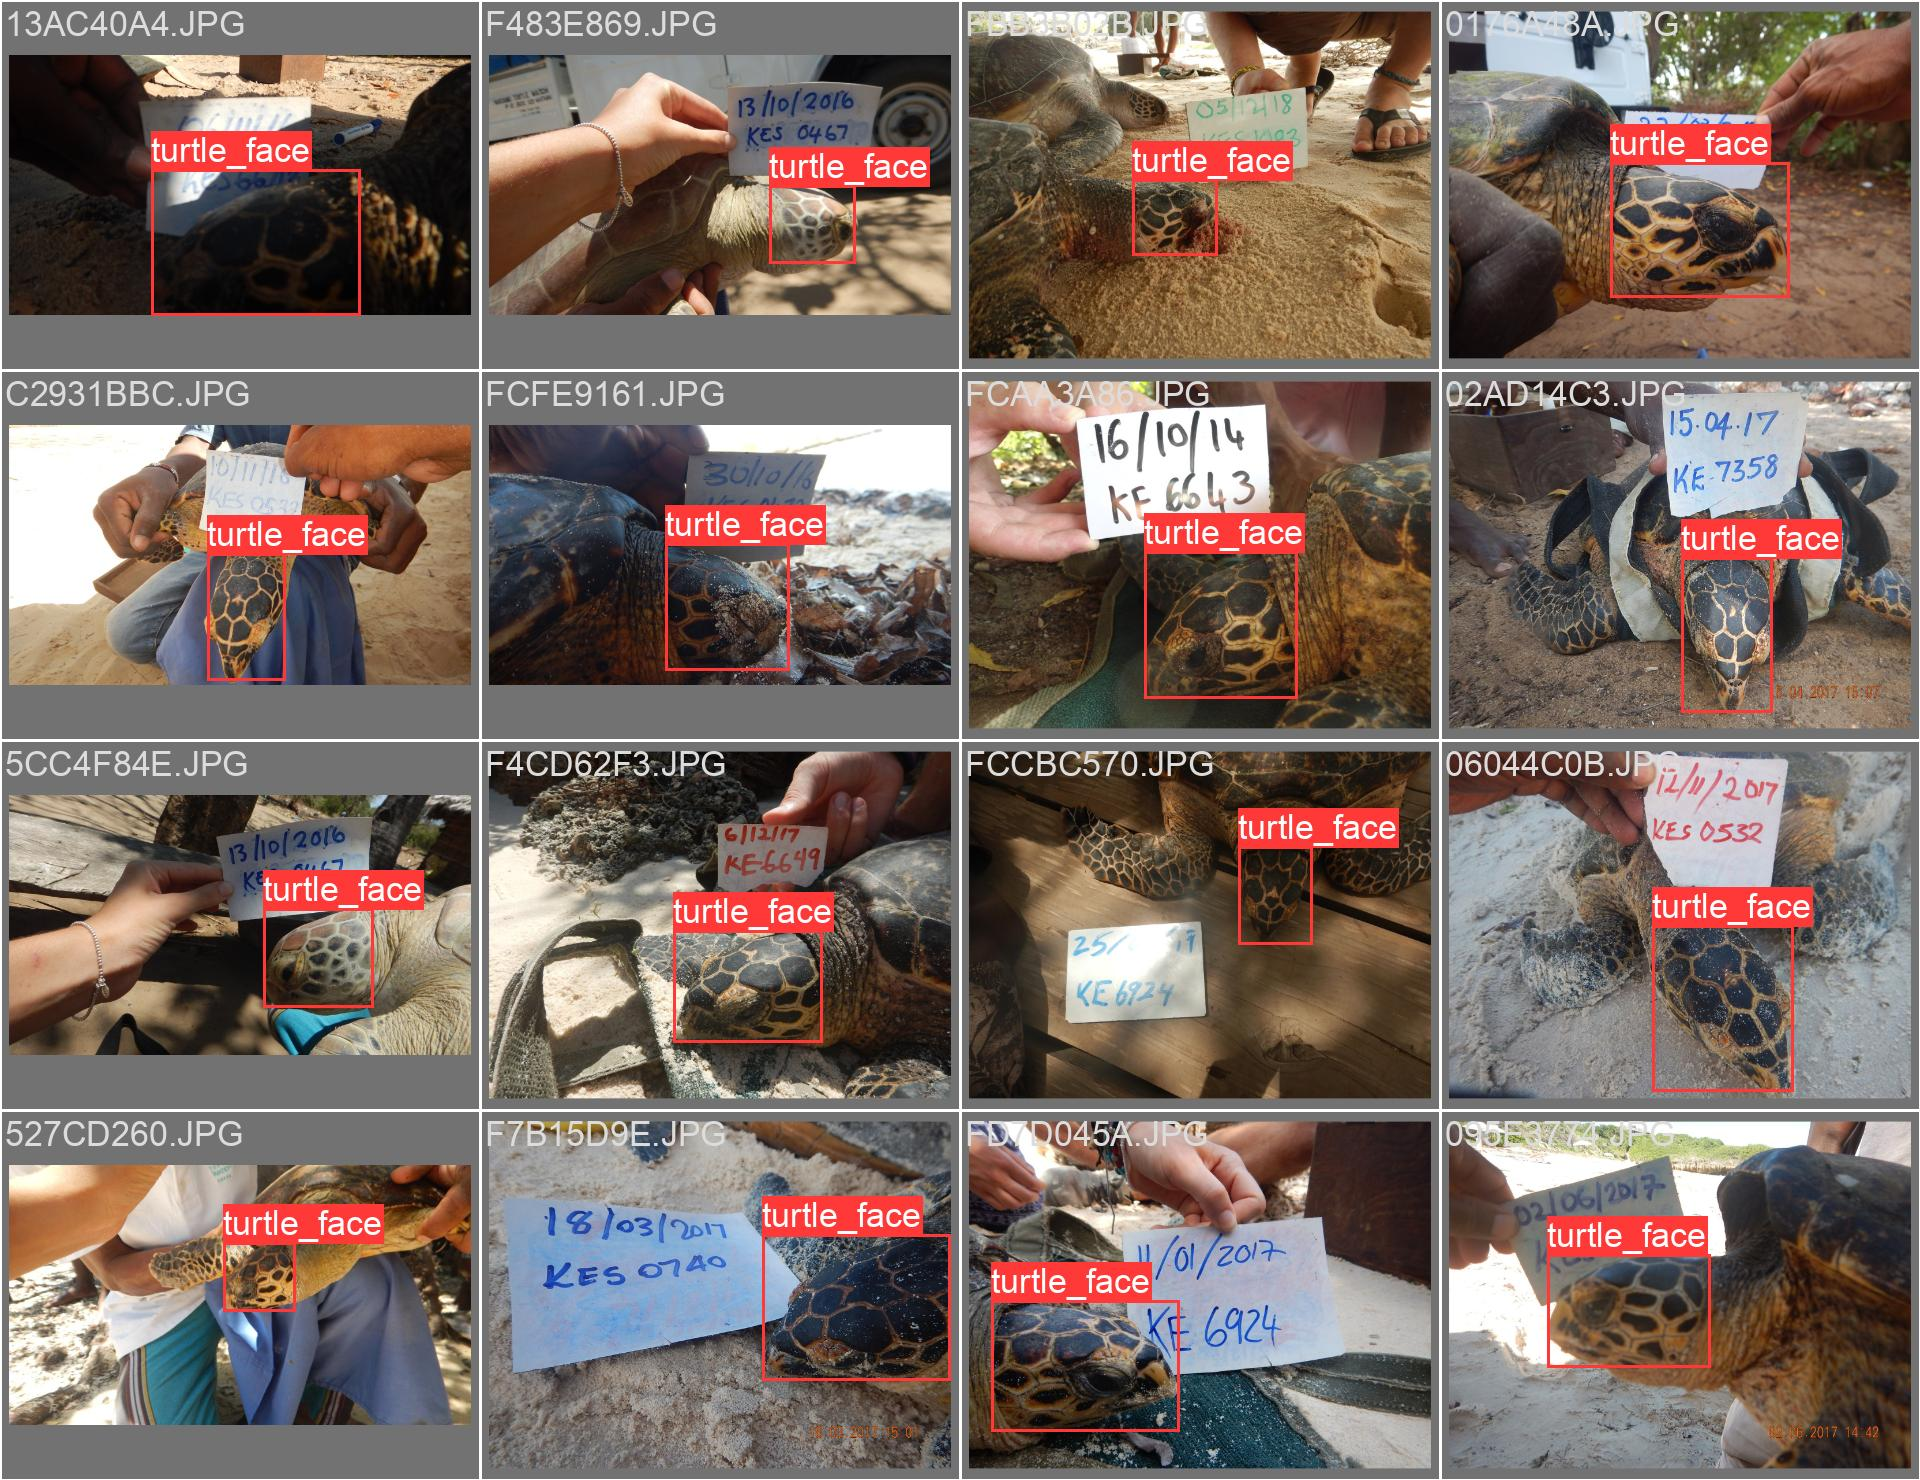

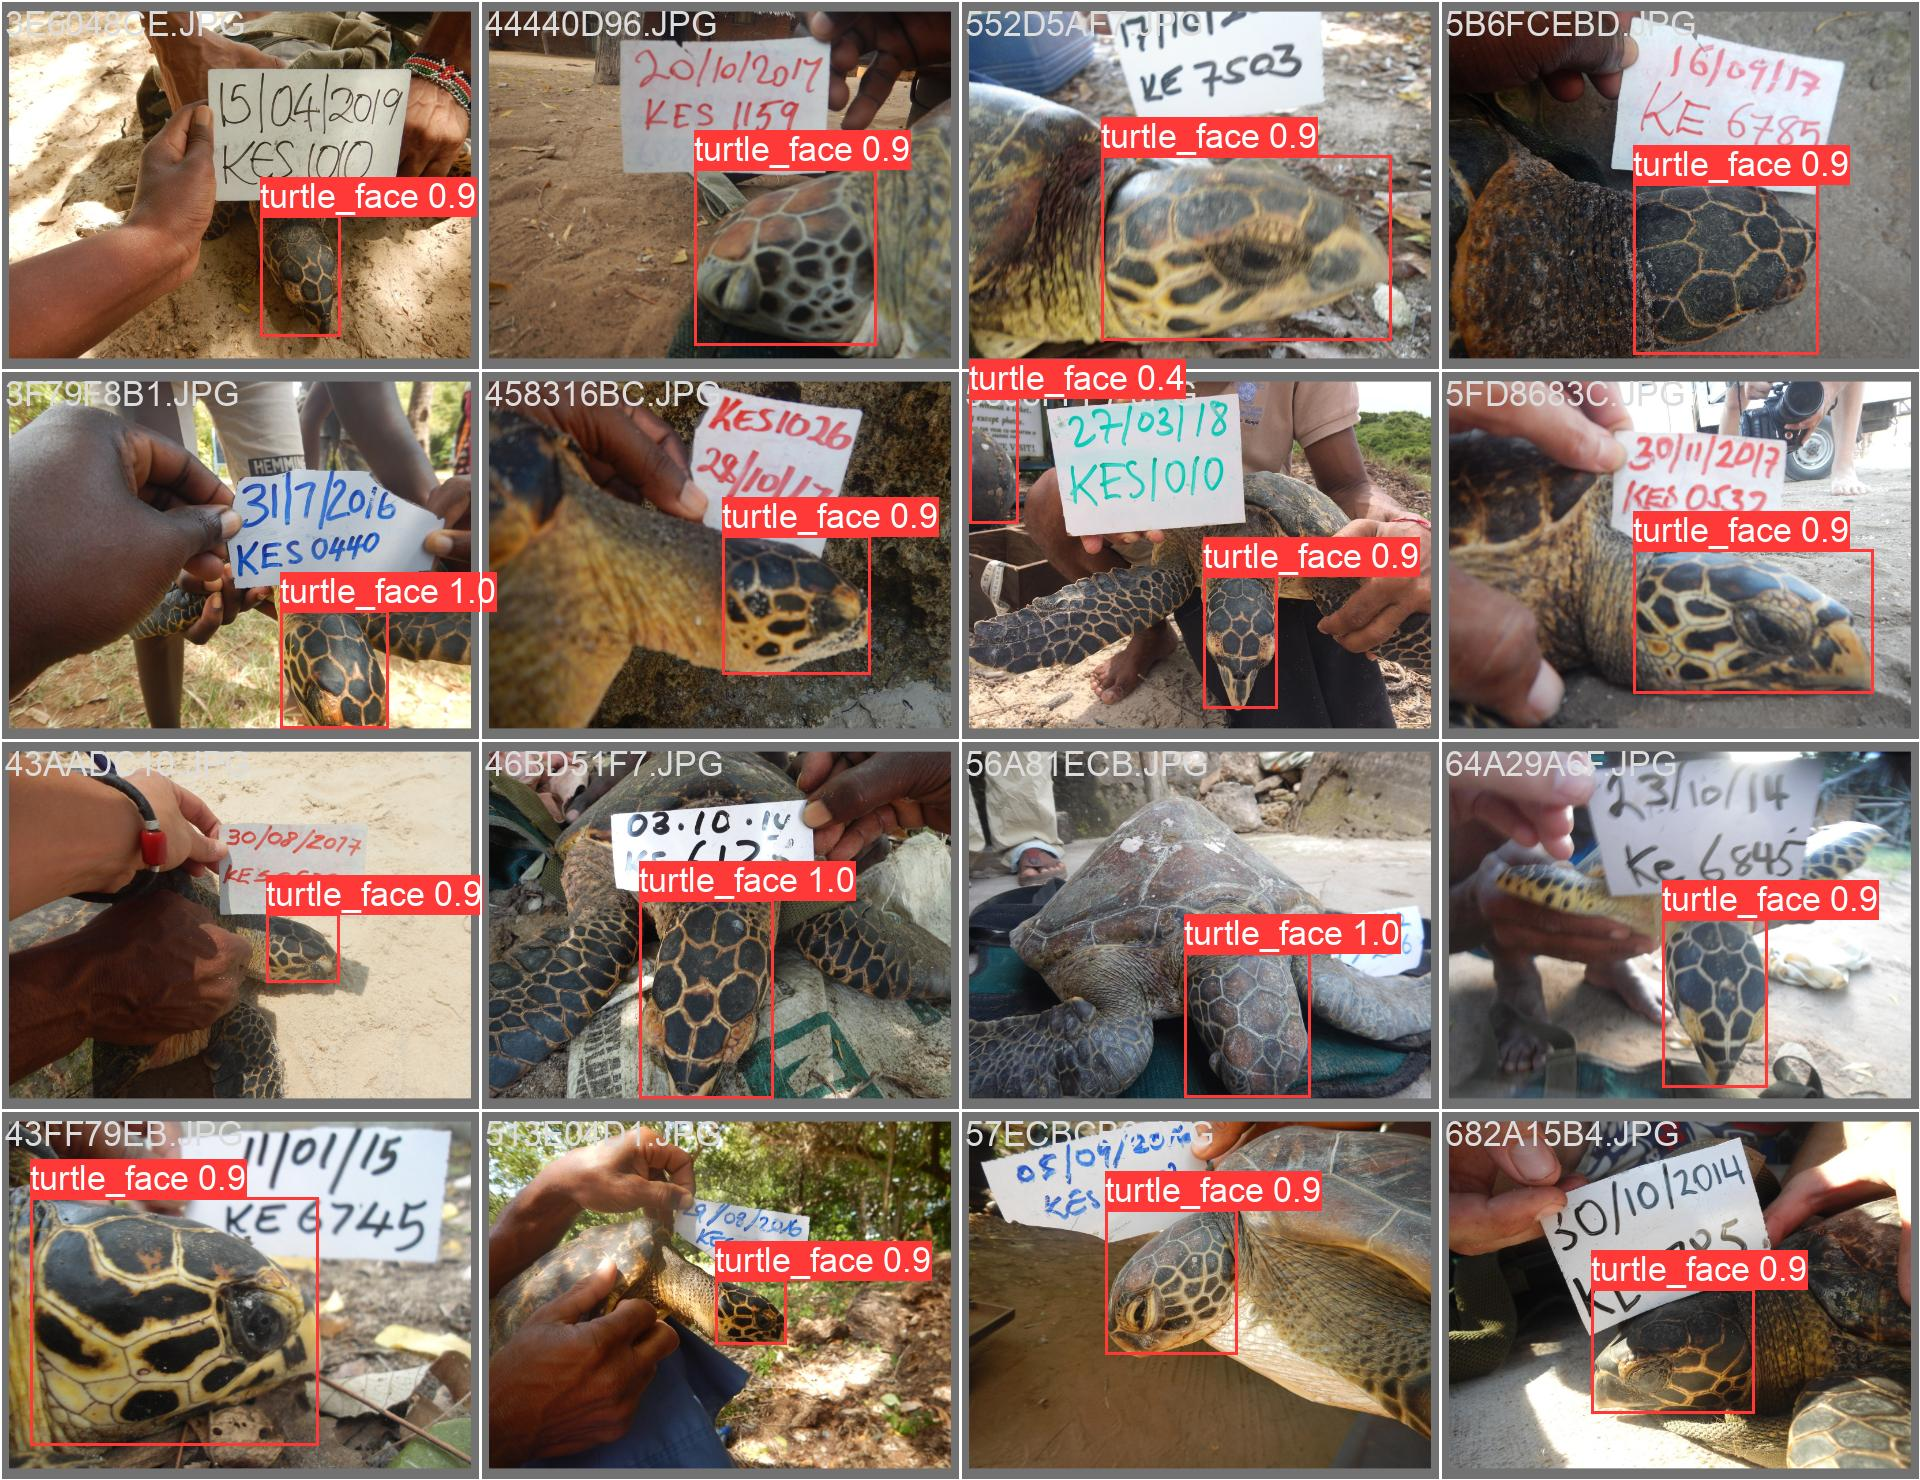

In [ ]:
import glob
from IPython.display import Image, display
# val_batch1_pred.jpg
for image_path in glob.glob(f'/content/runs/detect/val/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
img_w, img_h

(1024, 768)

**Submitting**

In [ ]:
sub_df = ss.copy()

In [ ]:
sub_df.head()

,Image_ID,x,y,w,h
0,4863D911,0,0,0,0
1,6DD3ADD5,0,0,0,0
2,E8DC4D6A,0,0,0,0
3,E02ABB6C,0,0,0,0
4,875C19F4,0,0,0,0


In [ ]:
%%time
# cols = ['Image_ID', 'x', 'y', 'w', 'h']
# dat = pd.DataFrame(columns=cols)

model = YOLO(f'/content/runs/detect/train/weights/best.pt')

# new_data = []
for i, row in sub_df.iterrows():
    results = model.predict(f'/content/IMAGES_1024/{row["Image_ID"]}.JPG')

    # Process results list
    for result in results:
        # Check if any boxes were detected
        if result.boxes:
            xywhn = result.boxes.xywhn.cpu().numpy()[0]
            # print('----------------')
            xyxyn = result.boxes.xyxyn.cpu().numpy()[0]
            pred_boxes = [xyxyn[0], xyxyn[1], xywhn[2], xywhn[3]]
            print(pred_boxes)
            sub_df.at[i, 'x'] = pred_boxes[0]
            sub_df.at[i, 'y'] = pred_boxes[1]
            sub_df.at[i, 'w'] = pred_boxes[2]
            sub_df.at[i, 'h'] = pred_boxes[3]
        else:
            print(f"No bounding boxes detected for image {row['Image_ID']}")

# dat = pd.concat([dat, pd.DataFrame(new_data)], ignore_index=True)


image 1/1 /content/IMAGES_1024/4863D911.JPG: 608x800 1 turtle_face, 206.1ms
Speed: 8.1ms preprocess, 206.1ms inference, 3.9ms postprocess per image at shape (1, 3, 608, 800)
[0.17613767, 0.3066155, 0.58692425, 0.50988996]

image 1/1 /content/IMAGES_1024/6DD3ADD5.JPG: 608x800 1 turtle_face, 44.1ms
Speed: 5.9ms preprocess, 44.1ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)
[0.33535758, 0.3120218, 0.3644673, 0.4756958]

image 1/1 /content/IMAGES_1024/E8DC4D6A.JPG: 608x800 1 turtle_face, 103.8ms
Speed: 18.6ms preprocess, 103.8ms inference, 2.3ms postprocess per image at shape (1, 3, 608, 800)
[0.36237517, 0.53045917, 0.44123444, 0.42021793]

image 1/1 /content/IMAGES_1024/E02ABB6C.JPG: 608x800 1 turtle_face, 97.9ms
Speed: 21.9ms preprocess, 97.9ms inference, 11.0ms postprocess per image at shape (1, 3, 608, 800)
[0.33187133, 0.5375285, 0.41709363, 0.3827771]

image 1/1 /content/IMAGES_1024/875C19F4.JPG: 608x800 1 turtle_face, 63.4ms
Speed: 4.3ms preprocess, 63.4ms inf

In [ ]:
%%time
# cols = ['Image_ID', 'x', 'y', 'w', 'h']
# dat = pd.DataFrame(columns=cols)

model = YOLO(f'/content/runs/detect/train/weights/best.pt')

# new_data = []
for i, row in sub_df.iterrows():
    results = model.predict(f'/content/IMAGES_1024/{row["Image_ID"]}.JPG')

    # Process results list
    for result in results:
        xywhn = result.boxes.xywhn.cpu().numpy()[0]
        # print('----------------')
        xyxyn = result.boxes.xyxyn.cpu().numpy()[0]
        pred_boxes = [xyxyn[0], xyxyn[1], xywhn[2], xywhn[3]]
        print(pred_boxes)
        sub_df.at[i, 'x'] = pred_boxes[0]
        sub_df.at[i, 'y'] = pred_boxes[1]
        sub_df.at[i, 'w'] = pred_boxes[2]
        sub_df.at[i, 'h'] = pred_boxes[3]

# dat = pd.concat([dat, pd.DataFrame(new_data)], ignore_index=True)




image 1/1 /content/IMAGES_1024/4863D911.JPG: 608x800 1 turtle_face, 42.7ms
Speed: 3.1ms preprocess, 42.7ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)
[0.17613767, 0.3066155, 0.58692425, 0.50988996]

image 1/1 /content/IMAGES_1024/6DD3ADD5.JPG: 608x800 1 turtle_face, 38.2ms
Speed: 3.1ms preprocess, 38.2ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 800)
[0.33535758, 0.3120218, 0.3644673, 0.4756958]

image 1/1 /content/IMAGES_1024/E8DC4D6A.JPG: 608x800 1 turtle_face, 38.2ms
Speed: 3.1ms preprocess, 38.2ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)
[0.36237517, 0.53045917, 0.44123444, 0.42021793]

image 1/1 /content/IMAGES_1024/E02ABB6C.JPG: 608x800 1 turtle_face, 37.7ms
Speed: 3.1ms preprocess, 37.7ms inference, 1.5ms postprocess per image at shape (1, 3, 608, 800)
[0.33187133, 0.5375285, 0.41709363, 0.3827771]

image 1/1 /content/IMAGES_1024/875C19F4.JPG: 608x800 1 turtle_face, 26.7ms
Speed: 3.0ms preprocess, 26.7ms inference,

In [ ]:
sub_df.head()

,Image_ID,x,y,w,h
0,4863D911,0.176138,0.306616,0.586924,0.509890
1,6DD3ADD5,0.335358,0.312022,0.364467,0.475696
2,E8DC4D6A,0.362375,0.530459,0.441234,0.420218
3,E02ABB6C,0.331871,0.537529,0.417094,0.382777
4,875C19F4,0.368399,0.468319,0.405220,0.395614


In [ ]:
sub_df.isna().sum()

Image_ID    0
x           0
y           0
w           0
h           0
dtype: int64

In [ ]:
sub_df.to_csv('yolo_comb.csv', index=False)

0